In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [2]:

# Step 1: Load the dataset of customer csv 
customers = pd.read_csv(r"C:/Users/ramiu/OneDrive/GenAi/ZeoTap Internship task/Customers_EDA/Customers.csv")


transactions = pd.read_csv(r'C:/Users/ramiu/OneDrive/GenAi/ZeoTap Internship task/Transactions_EDA/Transactions.csv')

In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [11]:


transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
# Data Preprocessing
# Merge the two datasets on a common key (assuming 'customer_id' is the key)
data = pd.merge(customers, transactions, on='CustomerID')

In [12]:
# Feature Engineering
# Create relevant features for clustering (e.g., total spend, frequency of transactions)
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'TransactionDate': 'count'  # Frequency of transactions
}).reset_index()

In [13]:
# Add additional features from the customers dataset
customer_features = pd.merge(customer_features, customers[['CustomerID', 'Region', 'SignupDate']], on='CustomerID')

In [14]:
# Convert categorical variables to numerical (e.g., Region)
customer_features['Region'] = customer_features['Region'].astype('category').cat.codes


In [15]:
# Standardize the features
features = customer_features[['TotalValue', 'TransactionDate', 'Region']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [16]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

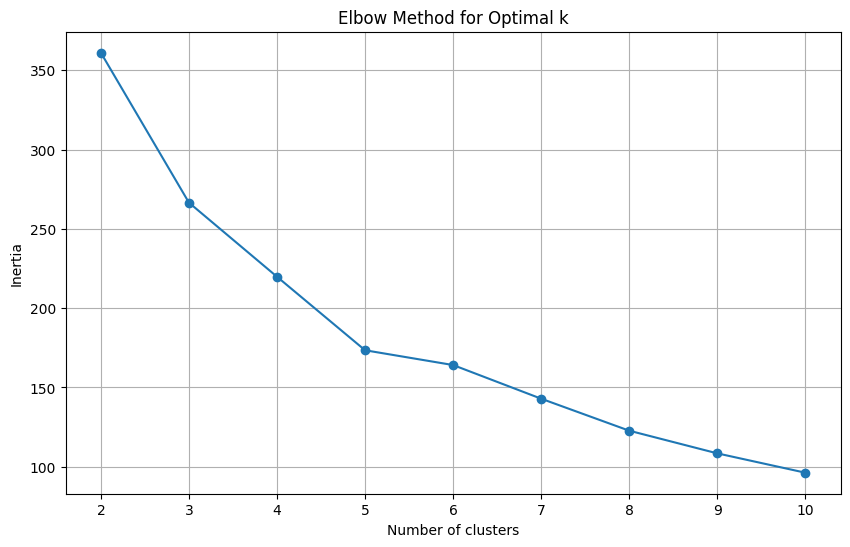

In [17]:
# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [18]:
# Choose the optimal number of clusters (let's say we choose 4 based on the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['cluster'] = kmeans.fit_predict(scaled_features)

In [19]:
# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_features['cluster'])

In [20]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
customer_features['pca_one'] = pca_result[:, 0]
customer_features['pca_two'] = pca_result[:, 1]

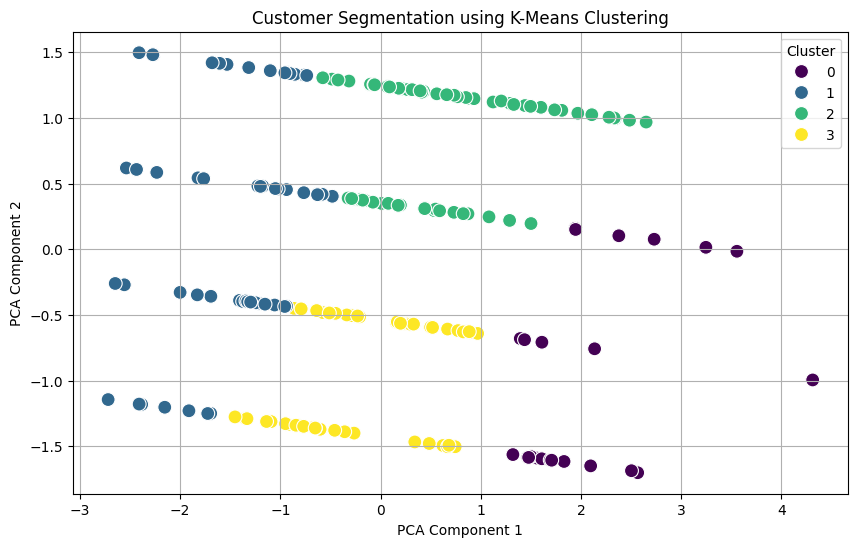

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=customer_features, palette='viridis', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [22]:
# Reporting the results
print(f'Number of clusters formed: {optimal_k}')
print(f'Davies-Bouldin Index: {db_index}')

Number of clusters formed: 4
Davies-Bouldin Index: 1.0062695737026348
